In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [166]:
df = pd.read_csv('webtraffic.csv')
df.head()

,Hour Index,Sessions
0,0,1418159421
1,1,1113769116
2,2,919158921
3,3,822352824
4,4,735526737


In [167]:
df.shape

(4896, 2)

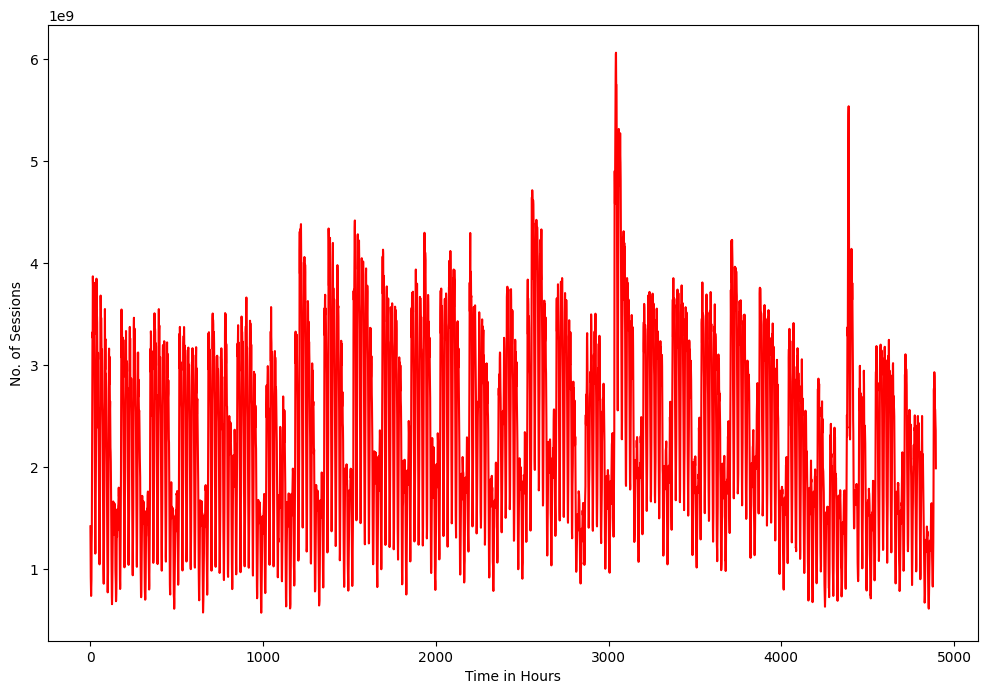

In [168]:
sessions = df['Sessions'].values
time = np.arange(len(sessions))
plt.figure(figsize=(12, 8))
plt.plot(time, sessions, 'r')
plt.xlabel('Time in Hours')
plt.ylabel('No. of Sessions')
plt.show()

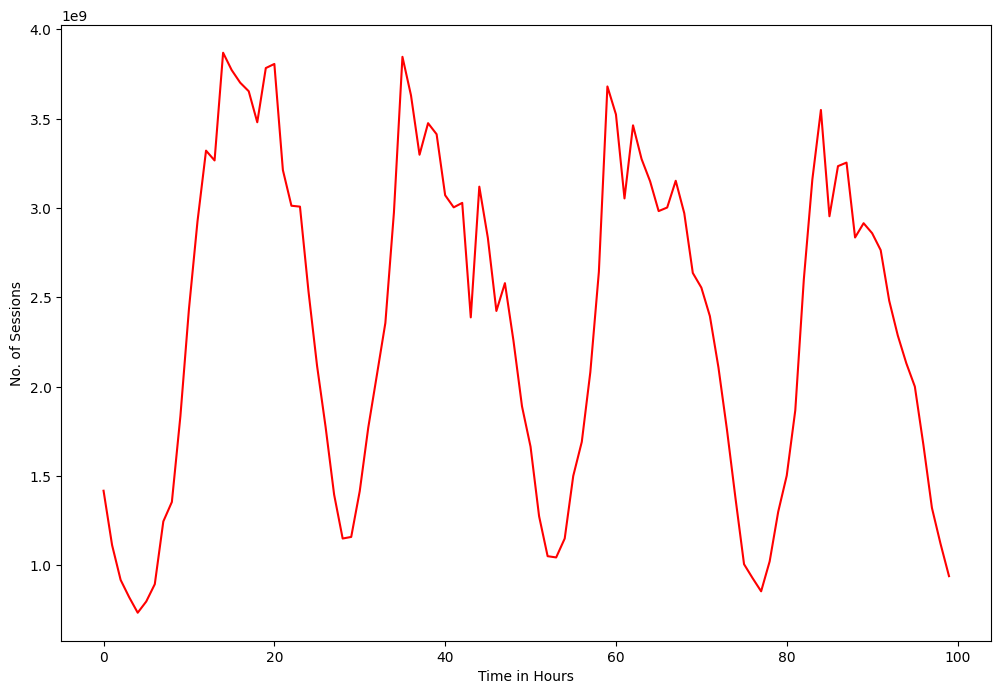

In [169]:
sample = sessions[:100]
time = np.arange(len(sample))
plt.figure(figsize=(12, 8))
plt.plot(time, sample, 'r')
plt.xlabel('Time in Hours')
plt.ylabel('No. of Sessions')
plt.show()

In [170]:
def splitting_data(seq, window_size):
  X = []
  y = []

  for i in range(0, len(seq)-window_size):
    X.append(seq[i:i+window_size])
    y.append(seq[i+window_size])

  return np.array(X), np.array(y)

In [171]:
X, y = splitting_data(sessions, 168)

In [172]:
X.shape, y.shape

((4728, 168), (4728,))

In [173]:
mid = int(0.8 * len(X))

X_train = X[:mid]
y_train = y[:mid]

X_test = X[mid:]
y_test = y[mid:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3782, 168), (3782,), (946, 168), (946,))

In [174]:
X_train, X_test

(array([[1418159421, 1113769116,  919158921, ..., 1712569716, 1721551725,
         1650693654],
        [1113769116,  919158921,  822352824, ..., 1721551725, 1650693654,
         1427141430],
        [ 919158921,  822352824,  735526737, ..., 1650693654, 1427141430,
         1185625188],
        ...,
        [3319351326, 3429131436, 3068853075, ..., 2044904049, 2392208397,
         2897196903],
        [3429131436, 3068853075, 3415159422, ..., 2392208397, 2897196903,
         3248493255],
        [3068853075, 3415159422, 3491007498, ..., 2897196903, 3248493255,
         3306377313]]),
 array([[3415159422, 3491007498, 3302385309, ..., 3248493255, 3306377313,
         3020949027],
        [3491007498, 3302385309, 3037915044, ..., 3306377313, 3020949027,
         3407175414],
        [3302385309, 3037915044, 3244501251, ..., 3020949027, 3407175414,
         3399191406],
        ...,
        [2888214894, 2803384809, 2464064469, ..., 2569852575, 2555880561,
         2454084459],
        [280

In [175]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.fit_transform(X_test)
X_train, X_test

(array([[-0.987396  , -1.31722963, -1.52848794, ..., -0.69509883,
         -0.68568217, -0.76351492],
        [-1.31672804, -1.52777504, -1.63322304, ..., -0.68528214,
         -0.76311993, -1.00780547],
        [-1.52728459, -1.63250788, -1.7271607 , ..., -0.76272486,
         -1.00743062, -1.2717265 ],
        ...,
        [ 1.06957955,  1.18772089,  0.79727906, ..., -0.3318816 ,
          0.04724989,  0.59862296],
        [ 1.18835504,  0.79794195,  1.17194998, ...,  0.04769676,
          0.59913028,  0.9825081 ],
        [ 0.79855547,  1.17260481,  1.25401047, ...,  0.59961243,
          0.98304708,  1.0457619 ]]),
 array([[ 1.73379804,  1.83305169,  1.60173279, ...,  1.78057909,
          1.86029812,  1.48935253],
        [ 1.82862721,  1.59685847,  1.26997336, ...,  1.85645716,
          1.48560245,  1.99719993],
        [ 1.59280202,  1.26568808,  1.5291213 , ...,  1.48229976,
          1.99262071,  1.9867018 ],
        ...,
        [ 1.0749848 ,  0.97200868,  0.55011799, ...,  

In [176]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(len(y_test), 1)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.fit_transform(y_test)
y_train

array([[-1.00820739],
       [-1.27212999],
       [-1.47170782],
       ...,
       [ 0.98211802],
       [ 1.0453722 ],
       [ 0.73346367]])

In [177]:
X_train.shape, X_test.shape

((3782, 168), (946, 168))

In [178]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape, X_test.shape

((3782, 168, 1), (946, 168, 1))

In [179]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint

In [180]:
# for dense_units in [32, 64, 100, 128]:
#     model = Sequential([
#         LSTM(128, input_shape=(168,1)),
#         Dense(dense_units, activation='relu'),
#         Dense(1, activation='linear')
#     ])
#     model.compile(optimizer='adam', loss='mse')
#     history = model.fit(X_train, y_train,
#                         validation_data=(X_test, y_test),
#                         epochs=30, verbose=0)
#     val_loss = min(history.history['val_loss'])
#     print(f"Dense={dense_units}, Best Val Loss={val_loss:.5f}")


In [181]:
model = Sequential([
        LSTM(128, input_shape=(168,1)),
        Dense(units=128, activation='relu'),
        Dense(1, activation='linear')
        ])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,201 (325.00 KB)

 Trainable params: 83,201 (325.00 KB)

 Non-trainable params: 0 (0.00 B)

In [182]:
checkpoint = ModelCheckpoint('best_weights.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [183]:
model.compile(loss='mse', optimizer='adam')

In [184]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=30, callbacks=[checkpoint])

Epoch 1/30
56/60 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4827
Epoch 1: val_loss improved from inf to 0.07054, saving model to best_weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.4642 - val_loss: 0.0705
Epoch 2/30
55/60 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0582
Epoch 2: val_loss improved from 0.07054 to 0.06136, saving model to best_weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0576 - val_loss: 0.0614
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0446
Epoch 3: val_loss improved from 0.06136 to 0.05009, saving model to best_weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0446 - val_loss: 0.0501
Epoch 4/30
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0392
Epoch 4: val_loss improved from 0.05009 to 0.04855, saving model to best_weights.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0392 - val_loss: 0.0486
Epoch 5/30
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0334
Epoch 5: val_loss improved from 0

In [185]:
model.load_weights('best_weights.keras')

In [186]:
mse = model.evaluate(X_test, y_test)
mse

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0246


0.026796400547027588

In [187]:
def evaluate_avg(data):
  pred = []
  for i in data:
    avg = np.sum(i) / len(i)
    pred.append(avg)
  return np.array(pred)

In [188]:
X_reshape = X_test.reshape(-1, 168)
y_pred = evaluate_avg(X_reshape)

In [189]:
y_pred.shape

(946,)

In [190]:
y_test.shape

(946, 1)

In [191]:
mse = np.sum((y_test - y_pred) ** 2) / len(y_test)
print(mse)

1021.9018727358102


In [192]:
def forcast(x_val, no_of_pred, ind):
  predictions = []
  temp = x_val[ind]

  for i in range(no_of_pred):
    pred = model.predict(temp.reshape(1, -1, 1))[0][0]
    temp = np.insert(temp, len(temp), pred)
    predictions.append(pred)
    temp = temp[1:]

  return predictions

In [193]:
ind = 10
no_of_pred = 24

In [194]:
y_pred = forcast(X_test, no_of_pred, ind)
y_true = y_test[ind: (ind + no_of_pred)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [195]:
y_true = y_scaler.inverse_transform(y_true.reshape(-1, 1))
y_pred = y_scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))

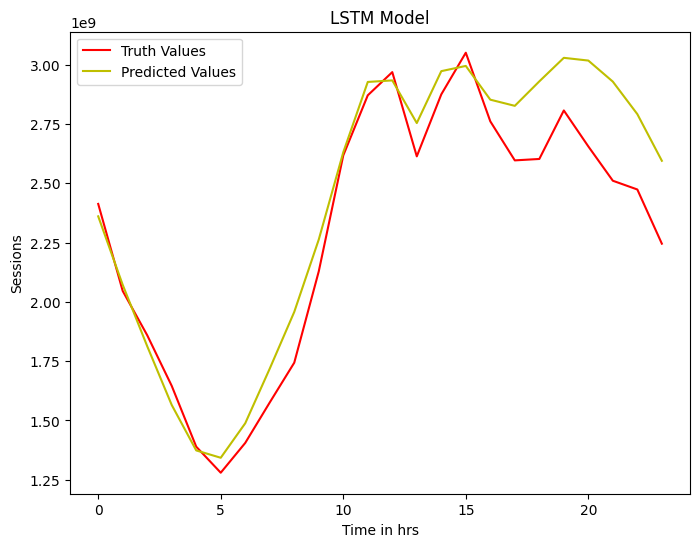

In [196]:
plt.figure(figsize=(8, 6))
ar = np.arange(len(y_true))
plt.plot(ar, y_true, 'r', label='Truth Values')
plt.plot(ar, y_pred, 'y', label='Predicted Values')
plt.xlabel('Time in hrs')
plt.ylabel('Sessions')
plt.title('LSTM Model')
plt.legend()
plt.show()

In [197]:
from keras.layers import Conv1D, Flatten

In [198]:
model2 = Sequential([
    Conv1D(64, 3, padding='same', activation='relu', input_shape=(168, 1)),
    Conv1D(32, 5, padding='same', activation='relu', input_shape=(168, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

model2.compile(loss='mse', optimizer='adam')
checkpoint2 = ModelCheckpoint('best_weights2.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=30, callbacks=[checkpoint2])

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2691
Epoch 1: val_loss improved from inf to 0.12992, saving model to best_weights2.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2670 - val_loss: 0.1299
Epoch 2/30
54/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0607
Epoch 2: val_loss improved from 0.12992 to 0.06393, saving model to best_weights2.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0588 - val_loss: 0.0639
Epoch 3/30
56/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0225
Epoch 3: val_loss improved from 0.06393 to 0.05039, saving model to best_weights2.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0223 - val_loss: 0.0504
Epoch 4/30
55/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0167
Epoch 4: val_loss improved from 0.05039 to 0.04218, saving model to best_weights2.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0167 - val_loss: 0.0422
Epoch 5/30
51/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142
Epoch 5: val_loss improved from 0.04218 to 0

In [199]:
model2.load_weights('best_weights2.keras')
mse = model2.evaluate(X_test, y_test)
mse

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0291


0.03131874278187752

In [200]:
def forcast(x_val, no_of_pred, ind):
  predictions = []
  temp = x_val[ind]

  for i in range(no_of_pred):
    pred = model2.predict(temp.reshape(1, -1, 1))[0][0]
    temp = np.insert(temp, len(temp), pred)
    predictions.append(pred)
    temp = temp[1:]

  return predictions

ind = 10
no_of_pred = 24

y_pred = forcast(X_test, no_of_pred, ind)
y_true = y_test[ind: (ind + no_of_pred)]

y_true = y_scaler.inverse_transform(y_true.reshape(-1, 1))
y_pred = y_scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


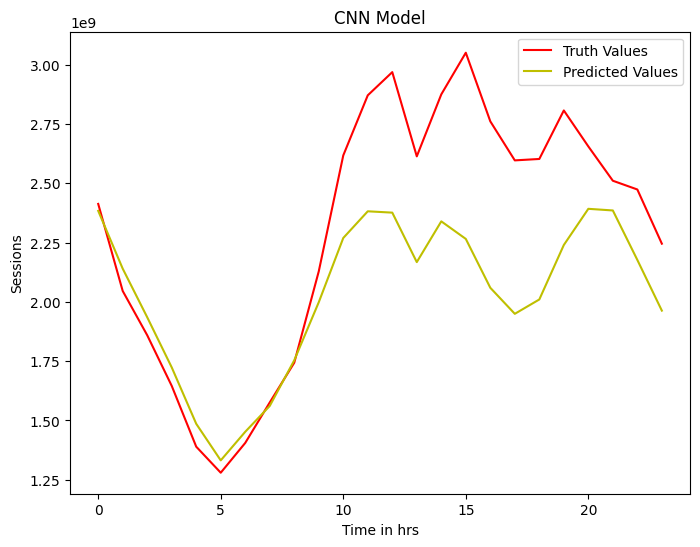

In [201]:
plt.figure(figsize=(8, 6))
ar = np.arange(len(y_true))
plt.plot(ar, y_true, 'r', label='Truth Values')
plt.plot(ar, y_pred, 'y', label='Predicted Values')
plt.xlabel('Time in hrs')
plt.ylabel('Sessions')
plt.title('CNN Model')
plt.legend()
plt.show()